In this file, the goal is to visualize the cross entropy for all the regions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import ks_2samp
from scipy import stats

In [6]:

def read_error_csv(path):

    if os.path.exists(path):
        df = pd.read_csv(path)
        return df
    return None

In [7]:
Participants_epilepsy=pd.read_csv("/neurospin/dico/data/human/epilepsy_PBS/participants.tsv", sep="\t")

In [8]:
epilepsy_controls= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="controls"]

In [9]:
def separate_epilepsy_PBS(error_epilepsy): #To separate the reconstruction error into controls, irm_neg and irm_pos
    error_epilepsy  = error_epilepsy.rename(columns={error_epilepsy.columns[0]: "Index"})

    error_control = error_epilepsy.merge(epilepsy_controls[["Index"]], on="Index", how="inner")

    return error_control

In [ ]:
dir_path= "/neurospin/tmp/fred/models/2025-11-10"

In [11]:
import re

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


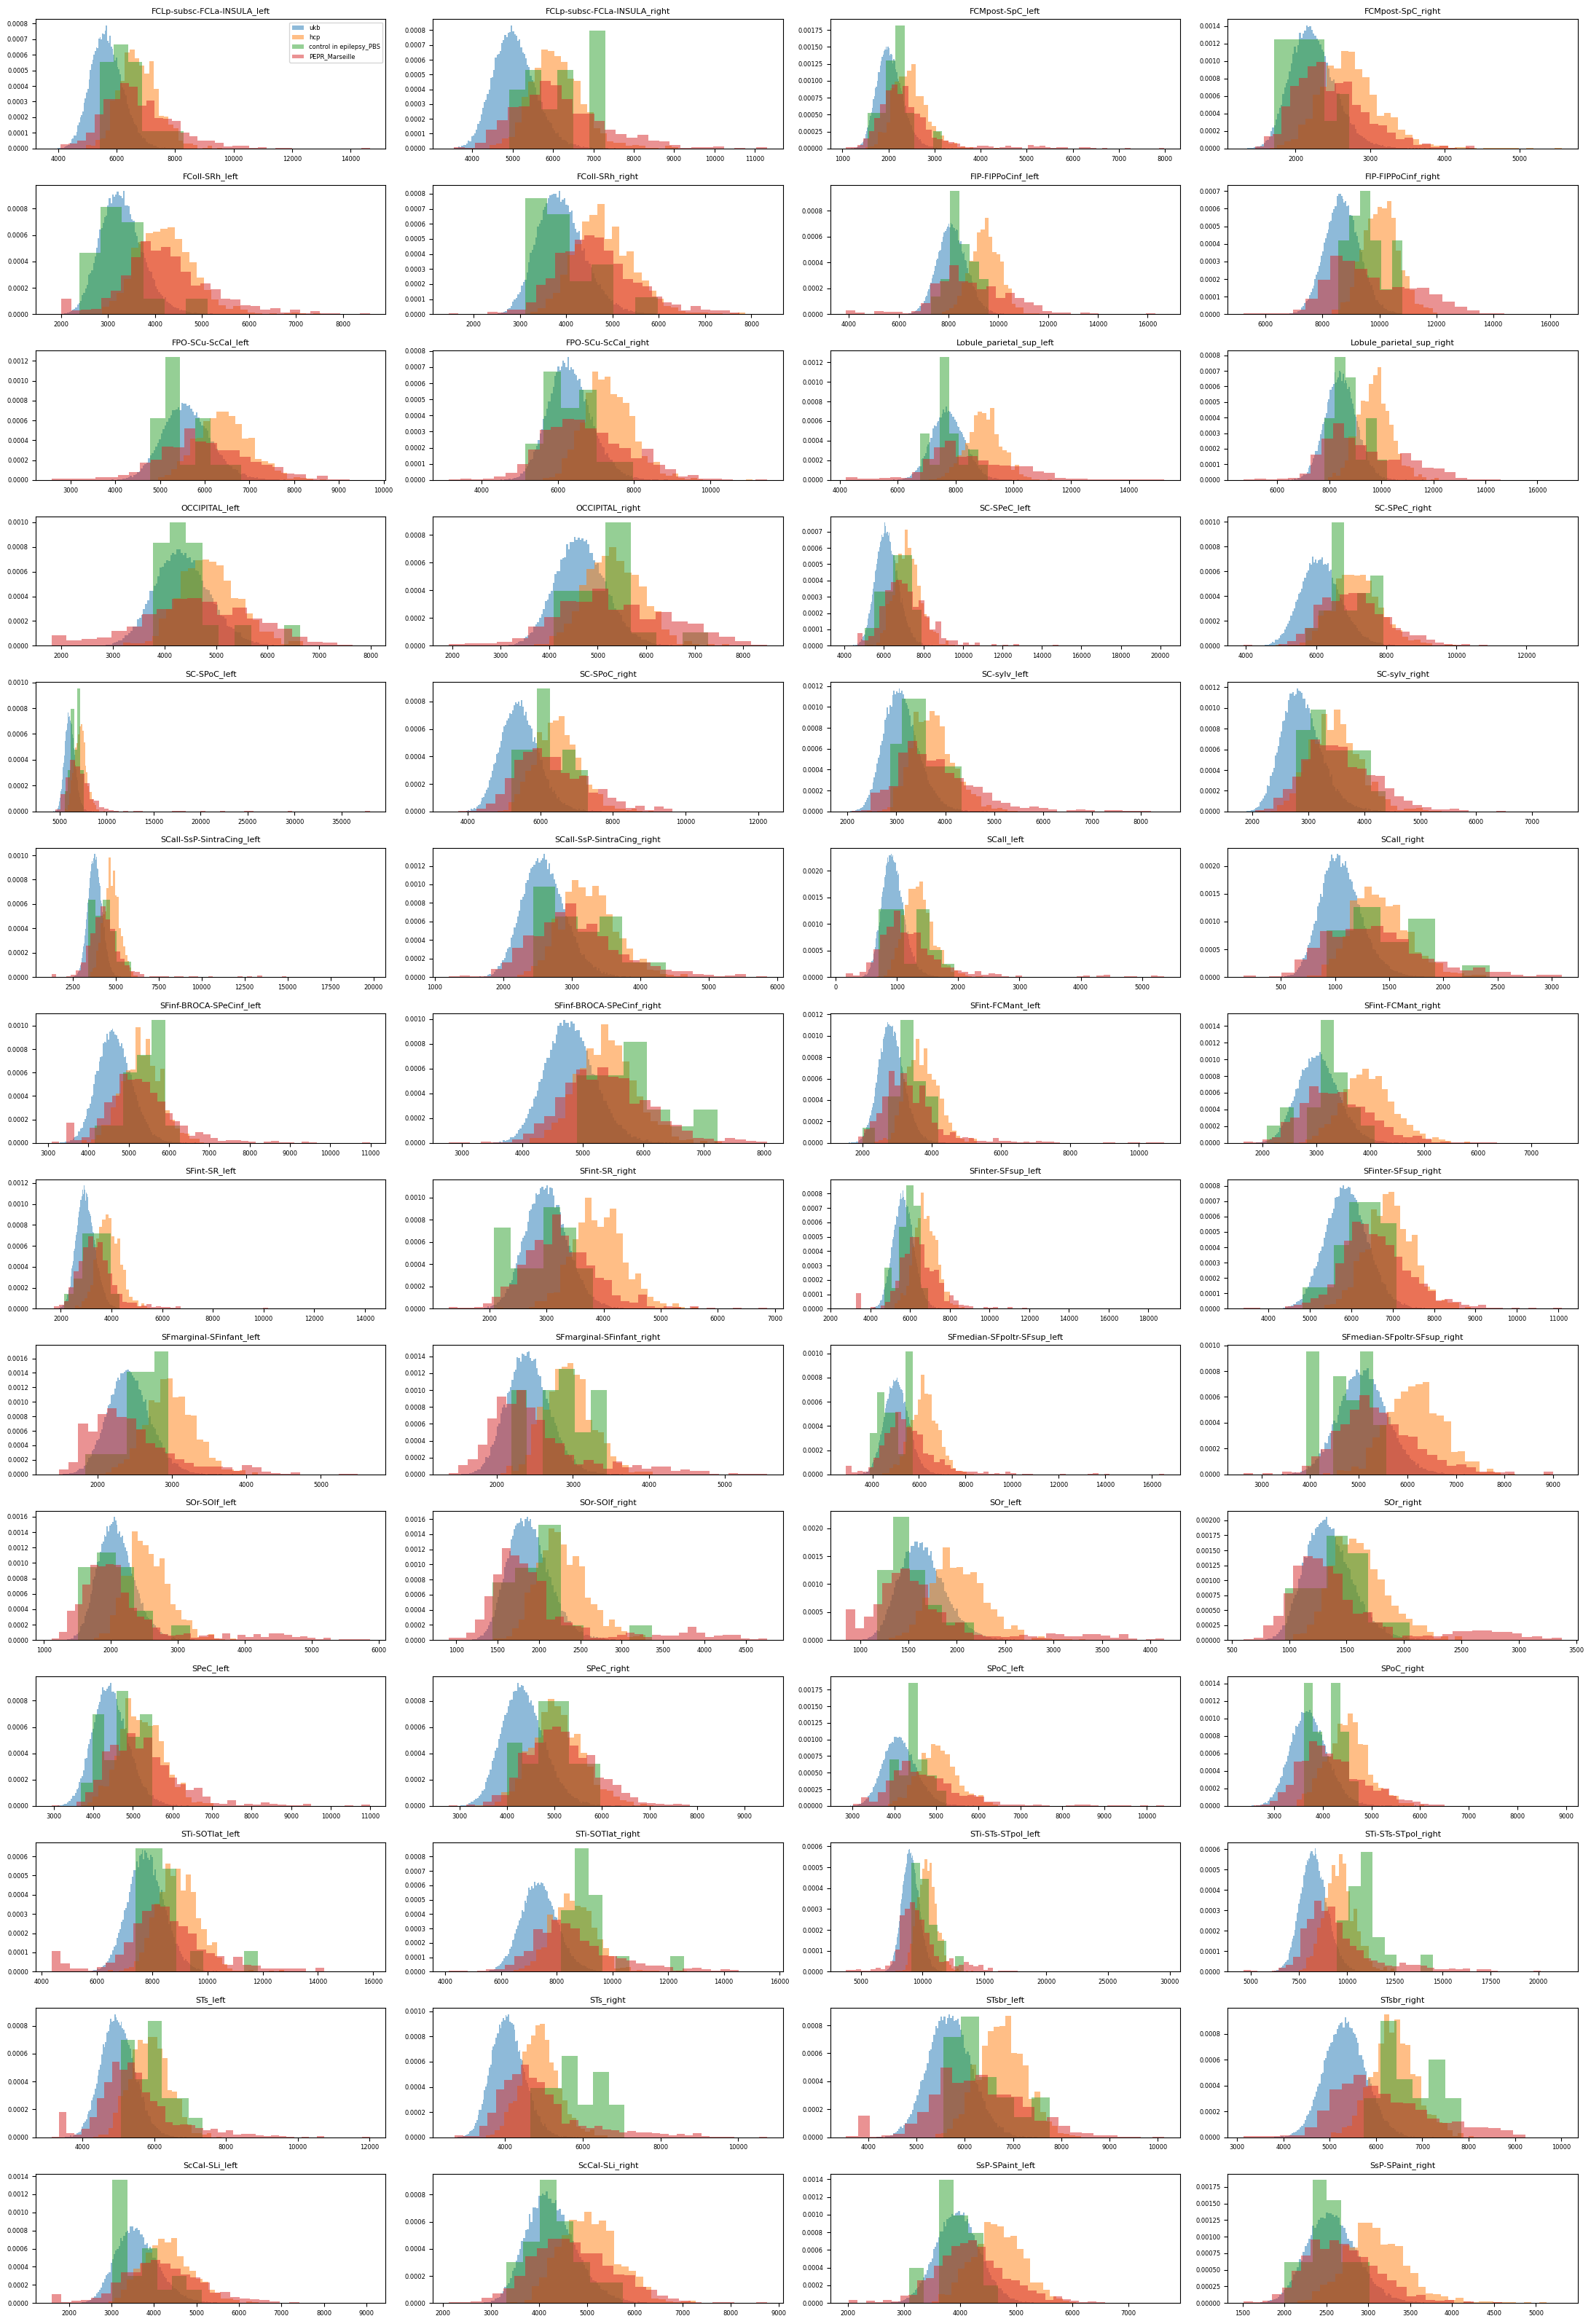


Tableau des distances de Kolmogorov smirnov :

                         regions  UKB and PEPR_Marseilles
0    FCLp-subsc-FCLa-INSULA_left                 0.497741
1   FCLp-subsc-FCLa-INSULA_right                 0.549234
2               FCMpost-SpC_left                 0.341996
3              FCMpost-SpC_right                 0.255016
4                 FColl-SRh_left                 0.560260
5                FColl-SRh_right                 0.451599
6             FIP-FIPPoCinf_left                 0.369831
7            FIP-FIPPoCinf_right                 0.393257
8             FPO-SCu-ScCal_left                 0.267297
9            FPO-SCu-ScCal_right                 0.273471
10      Lobule_parietal_sup_left                 0.364884
11     Lobule_parietal_sup_right                 0.362717
12                OCCIPITAL_left                 0.265718
13               OCCIPITAL_right                 0.378527
14                  SC-SPeC_left                 0.441113
15                 SC-SP

In [12]:

subfolders = sorted([
    f for f in os.listdir(dir_path)
    if os.path.isdir(os.path.join(dir_path, f))
])


rows, cols = 14, 4
total_plots = rows * cols

fig, axes = plt.subplots(rows, cols, figsize=(22, 32))
axes = axes.flatten()

# Table to  save the ks distance
ks_table = pd.DataFrame(columns=["regions", "UKB and PEPR_Marseilles"])

for i, folder in enumerate(subfolders):
    print(i)
    regions=re.match(r"(.*?(left|right))", folder).group(1)

    ax = axes[i]
    current_path = os.path.join(dir_path, folder)

    ukb_file = os.path.join(current_path, "Reconstruction_error.csv")
    hcp_file = os.path.join(current_path, "hcp", "Reconstruction_error.csv")
    epi_file = os.path.join(current_path, "epilepsy_PBS", "Reconstruction_error.csv")
    PEPR_file= os.path.join(current_path, "PEPR_Marseille", "Reconstruction_error.csv")

    #print(ukb_file)

    # lecture
    error_ukb = read_error_csv(ukb_file)
    error_hcp = read_error_csv(hcp_file)
    error_epilepsy = read_error_csv(epi_file)
    error_PEPR = read_error_csv(PEPR_file)
    #print(len(error_ukb))

    error_control= separate_epilepsy_PBS(error_epilepsy)


    ax.hist(error_ukb.iloc[:,1], density=True, alpha=0.5, label="ukb", bins="auto")
    ax.hist(error_hcp.iloc[:,1], density=True, alpha=0.5, label="hcp", bins="auto")
    ax.hist(error_control.iloc[:,1], density=True, alpha=0.5, label="control in epilepsy_PBS", bins="auto")
    ax.hist(error_PEPR.iloc[:,1], density=True, alpha=0.5, label="PEPR_Marseille", bins="auto")

    ax.set_title(regions, fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    if i == 0:
        ax.legend(fontsize=6)

    # KS distances

    ks_ukb_PEPR= ks_2samp(error_ukb.iloc[:,1], error_PEPR.iloc[:,1]).statistic

    ks_table.loc[i] = [regions, ks_ukb_PEPR ]

plt.tight_layout()
plt.show()

# Affichage final du tableau KS
print("\nTableau des distances de Kolmogorov smirnov :\n")
print(ks_table)


In [13]:
names= ks_table.iloc[:,0]

value = ks_table.iloc[:,1]


In [14]:
visualize_distance= pd.DataFrame({ "region": names,
                                  "p": value})

visualize_distance

,region,p
0,FCLp-subsc-FCLa-INSULA_left,0.497741
1,FCLp-subsc-FCLa-INSULA_right,0.549234
2,FCMpost-SpC_left,0.341996
3,FCMpost-SpC_right,0.255016
4,FColl-SRh_left,0.560260
5,FColl-SRh_right,0.451599
6,FIP-FIPPoCinf_left,0.369831
7,FIP-FIPPoCinf_right,0.393257
8,FPO-SCu-ScCal_left,0.267297
9,FPO-SCu-ScCal_right,0.273471


In [15]:
sorted_distance = visualize_distance.sort_values(by="p", ascending=False)
sorted_distance

,region,p
4,FColl-SRh_left,0.560260
1,FCLp-subsc-FCLa-INSULA_right,0.549234
41,SPeC_right,0.525760
19,SC-sylv_right,0.512162
0,FCLp-subsc-FCLa-INSULA_left,0.497741
40,SPeC_left,0.478253
15,SC-SPeC_right,0.478111
18,SC-sylv_left,0.472290
45,STi-SOTlat_right,0.468238
5,FColl-SRh_right,0.451599


In [16]:
sorted_distance.to_csv("Distance_between_ukb_and_PEPR_for_all_regions")